# Welcome!

Today we're going to present last-time's topic - **Linear Regression** in a more generalized way. You'll see that this algorithm doesn't change a lot, when we want to fit our model to more features than just one!

This will be an occasion to introduce and tackle some problems faced by data scientists on a daily basis, such as:
- data normalization
- regularization of the cost function
- overfitting
- dividing the data into training and test sets

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
import solutions
import csv
import random

%matplotlib inline

# Problem

## Previously

### $$\hat{y} = h_W(x) = w_0 + w_1x$$ 

## Today

### $$\hat{y} = h_W(x_1, x_2, ..., x_k) = w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_kx_k = w_0 + \sum_{i=1}^k w_i x_i$$ 

## or:

### $W$ - vector of coefficients or 'weights'

$$ W = [w_0, w_1, ..., w_k]$$

### $X^{(i)}$ - vector of  features of an i-th test case
$$ X^{(i)} = [x^{(i)}_0, x^{(i)}_1, ... x^{(i)}_k] $$
... where $x_0$ = 1, so that
$$h_W(X^{(i)}) = \sum_{j=0}^k w_j x_j =  X^{(i)'} * W$$


In [2]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]

X = np.array([[1,2,3], [4,5,6]])
print(X)
print(add_bias_feature(X))

[[1 2 3]
 [4 5 6]]
[[ 1.  1.  2.  3.]
 [ 1.  4.  5.  6.]]


In [3]:
def hypotheses(W, X):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # return a vector of hypotheses for *all* x-s 

SyntaxError: unexpected EOF while parsing (<ipython-input-3-1c2842ad0924>, line 4)

In [4]:
hypotheses = solutions.hypotheses

# Cost function

### $$L = \frac{1}{2N}\sum_{i=0}^N(h_W(x^{(i)}) - y^{(i)})^2 $$
## Previously

### $$L(w_0, w_1) = \frac{1}{2N}\sum_{i=0}^N(w_0 + w_1x^{(i)} - y^{(i)})^2 $$

## Today

### $$L(w_0, w_1, ... w_n) = L(W) = \frac{1}{2N}\sum_{i=0}^N(\sum_{j=0}^k w_j x^{(i)}_j - y^{(i)})^2 = \frac{1}{2N}\sum_{i=0}^N (h_W(x^{(i)}) - y^{(i)})^2$$

In [ ]:
def cost(W, X, Y):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # Y: a vector of our values
    # return cost (a scalar)

In [9]:
W = np.array([1,2,3])
print(np.transpose(W))

[1 2 3]


In [5]:
cost = solutions.cost

# Gradient descent

For every iteration:
* calculate partial derivatives of cost function with respect to every element of W:

$$\epsilon_j = \frac{\partial}{\partial w_j}L(W) = \frac{1}{N} \sum_{i=1}^N(h_W(x^{(i)}) - y^{(i)})x_j^{(i)}$$

* **simultaneously** update every element of W:

$$w_j = w_j - \alpha \epsilon_j$$ 

Where $\alpha$ is our learning rate.

In [ ]:
def gradient_step(W, X, Y, learning_rate=0.01):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # Y: a vector of our values
    # return a vector of new values of W

In [10]:
gradient_step = solutions.gradient_step

# Polynomial regression: a possible use case

This is a plot of a secret polynomial:

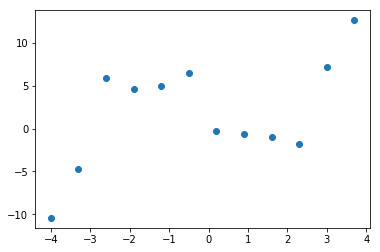

In [11]:
secret = solutions.secret_polynomial
X = np.arange(-4, 4, 0.7)
Y = [secret(x) for x in X]
plt.scatter(X, Y)
plt.show()

What degree of a polynomial could that be?

In [12]:
def to_poly_features(X, proposed_degree):
    # notice that x ** 0 = 1, so bias feature is already added here
    return np.array([[x ** n for n in range(proposed_degree)] for x in X])


In [15]:
proposed_degree = 7
features = to_poly_features(X, proposed_degree)
targets = np.array(Y)
for i in range(5):
    print(features[i])
    print()

[  1.00000000e+00  -4.00000000e+00   1.60000000e+01  -6.40000000e+01
   2.56000000e+02  -1.02400000e+03   4.09600000e+03]

[  1.00000000e+00  -3.30000000e+00   1.08900000e+01  -3.59370000e+01
   1.18592100e+02  -3.91353930e+02   1.29146797e+03]

[   1.         -2.6         6.76      -17.576      45.6976   -118.81376
  308.915776]

[  1.        -1.9        3.61      -6.859     13.0321   -24.76099
  47.045881]

[ 1.       -1.2       1.44     -1.728     2.0736   -2.48832   2.985984]



## Feature scaling to the rescue!

We want all our features to be roughly in the same range, i.e [-1, 1]. This is called **data normalization**. 

One way to achieve it is **mean normalization**:

$$x_i = \frac{x_i - \mu_i}{max(X) - min(X)}$$

Of course, since $x_0$ is always equal to 1, we don't normalize it!

In [ ]:
def mean_normalization(X, means=None, ranges=None):
    # implement me!
    # X - a matrix of features
    # calculate means and ranges if necessary
    # calculate normalized matrix X using calculated or given means and ranges
    # return X, means and ranges (we may want to reuse them)
    # do not normalize the first column of ones!

In [16]:
mean_normalization = solutions.mean_normalization

In [19]:
features, means, ranges = mean_normalization(features)
for i in range(5):
    print(features[i])
    print()

[ 1.         -0.5         0.63523392 -0.53525856  0.75942226 -0.56957032
  0.81269324]

[ 1.         -0.40909091  0.31505848 -0.29049393  0.2226693  -0.20120448
  0.12799303]

[ 1.         -0.31818182  0.05628655 -0.13034984 -0.06207662 -0.04251467
 -0.11188788]

[ 1.         -0.22727273 -0.14108187 -0.03687649 -0.18967703  0.0122487
 -0.17582096]

[ 1.         -0.13636364 -0.27704678  0.00787594 -0.23248394  0.02521723
 -0.18657777]



[ 0.08529738  0.94821077  0.57347724  0.60373554  0.02383439  0.21144596
  0.0867517 ]


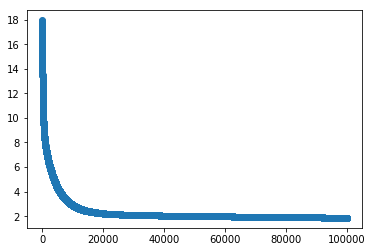

[  1.92480598 -20.52912151  -0.15243825  30.62086958  -0.86716414
  16.05829347   3.30661736]


In [23]:
W = np.random.rand(proposed_degree)
print(W)
costs = []
steps = 100000

for i in range(steps):
    W = gradient_step(W, features, targets, 0.01)
    costs.append(cost(W, features, targets))

# it is always a good idea to plot the cost function to see how learning goes
step_nums = [i for i in range(steps)]
plt.scatter(x=step_nums, y=costs)
plt.show()
print(W)

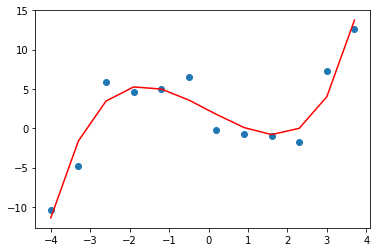

array([  1.92480598, -20.52912151,  -0.15243825,  30.62086958,
        -0.86716414,  16.05829347,   3.30661736])

In [24]:
calculated_targets = hypotheses(W, features)
plt.scatter(X, Y)
plt.plot(X, calculated_targets, color='red')
plt.show()
W

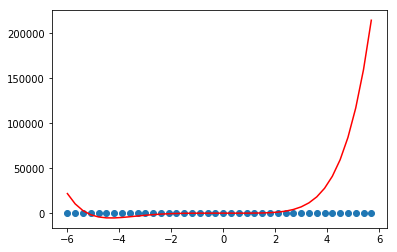

array([  1.92480598, -20.52912151,  -0.15243825,  30.62086958,
        -0.86716414,  16.05829347,   3.30661736])

In [25]:
more_X = np.arange(-6, 6, 0.3)
more_Y = [secret(x) for x in more_X]
more_features = to_poly_features(more_X, proposed_degree)
more_features, means, ranges = mean_normalization(more_features, means, ranges)
more_targets = np.array(Y)

more_calculated_targets = hypotheses(W, more_features)
plt.scatter(more_X, more_Y)
plt.plot(more_X, more_calculated_targets, color='red')
plt.show()
W

In [26]:
interact(solutions.perform_polynomial_regression,
        steps=widgets.IntSlider(min=100,max=1000000,step=1000,value=1000), 
        degree=widgets.IntSlider(min=1,max=30,step=1,value=1))

interactive(children=(IntSlider(value=1000, description='steps', max=1000000, min=100, step=1000), IntSlider(value=1, description='degree', max=30, min=1), Output()), _dom_classes=('widget-interact',))

<function solutions.perform_polynomial_regression>

# Let's play with real-life data!


In [27]:
houses = np.genfromtxt('houses.csv', delimiter=',')
# area, number of bedrooms, price

houses

array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05],
       [  1.98500000e+03,   4.00000000e+00,   2.99900000e+05],
       [  1.53400000e+03,   3.00000000e+00,   3.14900000e+05],
       [  1.42700000e+03,   3.00000000e+00,   1.98999000e+05],
       [  1.38000000e+03,   3.00000000e+00,   2.12000000e+05],
       [  1.49400000e+03,   3.00000000e+00,   2.42500000e+05],
       [  1.94000000e+03,   4.00000000e+00,   2.39999000e+05],
       [  2.00000000e+03,   3.00000000e+00,   3.47000000e+05],
       [  1.89000000e+03,   3.00000000e+00,   3.29999000e+05],
       [  4.47800000e+03,   5.00000000e+00,   6.99900000e+05],
       [  1.26800000e+03,   3.00000000e+00,   2.59900000e+05],
       [  2.30000000e+03,   4.00000000e+00,   4.4990000

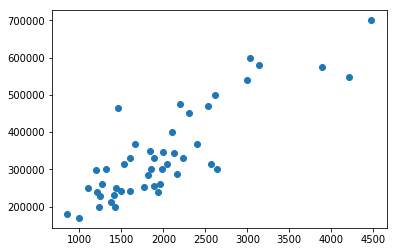

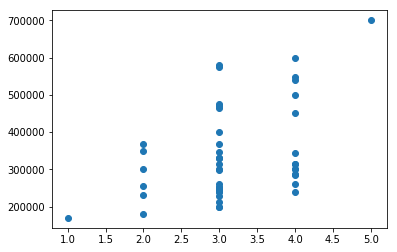

In [28]:
prices = houses[:, 2]
# relationship between area and price
areas = houses[:, 0]
plt.scatter(areas, prices)
plt.show()

# relation between no. of bedrooms
bedrooms_nos = houses[:, 1]
plt.scatter(bedrooms_nos, prices)
plt.show()

First, data must be normalized

In [29]:
features = add_bias_feature(houses[:, :-1]) 
targets = houses[:, 2]
features, _, _ = mean_normalization(features)

Now, let's split data into training and test sets

In [30]:
train_size = int(len(houses) * 2/3) 
train_numbers = random.sample(range(len(houses)), train_size)

train_features = np.array([features[i] for i in range(len(houses)) if i in train_numbers])
train_targets = np.array([targets[i] for i in range(len(houses)) if i in train_numbers])

test_features = np.array([features[i] for i in range(len(houses)) if i not in train_numbers])
test_targets = np.array([targets[i] for i in range(len(houses)) if i not in train_numbers])

len(train_features), len(train_targets), len(test_featW = gradient_step(W, train_features, train_targets, 0.1)ures), len(test_targets)

(31, 31, 16, 16)

Let's train our model. Our model will consider only the training se during the training. 

We will plot the cost function to see how well the model performs on the training data, but also, separately, plot cost calculated for test data. This will help us see how well the model generalizes.

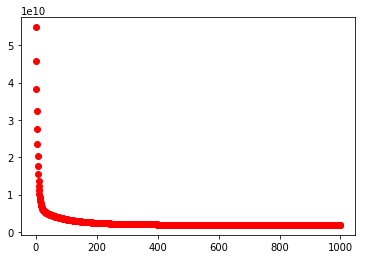

In [33]:
W = np.random.rand(3)
train_costs = []
test_costs = []
steps = 1000

for i in range(steps):
    W = gradient_step(W, train_features, train_targets, 0.1)
    train_costs.append(cost(W, train_features, train_targets))
    test_costs.append(cost(W, test_features, test_targets))
    
step_nums = [i for i in range(steps)]
# plt.scatter(x=step_nums, y=train_costs)
plt.scatter(x=step_nums, y=test_costs, color='red')

plt.show()

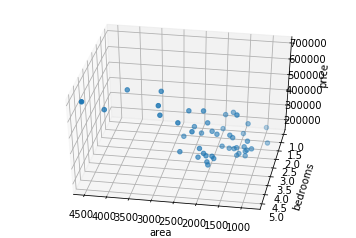

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(areas, bedrooms_nos, prices)
ax.view_init(40, 100)

ax.set_xlabel('area')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()